In [1]:
# Standard libraries
import re
import json
import pickle as pkl
import numpy as np
from tabulate import tabulate
# RDKit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
# Matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

### Coronene

#### Load data

In [2]:
# Load data from pickl file
data_file = open('./raw/data_coronene_voigt.pkl', 'rb')
data = pkl.load(data_file)

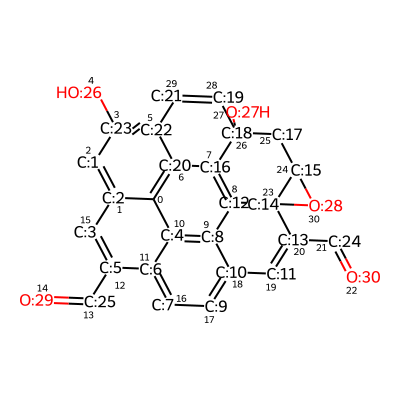

In [4]:
IPythonConsole.drawOptions.addAtomIndices=True
IPythonConsole.drawOptions.annotationFontScale=0.6
IPythonConsole.molSize = 400,400
# Show the molecule with RDKit
mol = Chem.MolFromSmiles(data.iloc[0]['SMILES'])
mol

#### View data statistics

In [8]:
num = 0

for i in ids:
    for key in dict[1][i]:
        if max(dict[1][i][key]) > num:
            num = max(dict[1][i][key])

print(num)

1.0


In [5]:
atoms = 0
# Array features (hybridization, number of Hs, aromatic, ring)
features = np.zeros([4, 2, 3, 2, 2])

# Loop through all molecules in datasets
for index, row in data.iterrows():
    smiles = row['SMILES']
    mol = Chem.MolFromSmiles(smiles)
    for atom in mol.GetAtoms():
        if atom.GetAtomicNum() == 6: # or atom.GetAtomicNum() == 8:
            atoms += 1
            if atom.GetDegree() == 1:
                if atom.GetHybridization() == Chem.rdchem.HybridizationType.SP2:
                    if atom.GetTotalNumHs() == 0:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[0, 0, 0, 0, 0] += 1
                            else:
                                features[0, 0, 0, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[0, 0, 0, 1, 0] += 1
                            else:
                                features[0, 0, 0, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 1:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[0, 0, 1, 0, 0] += 1
                            else:
                                features[0, 0, 1, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[0, 0, 1, 1, 0] += 1
                            else:
                                features[0, 0, 1, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 2:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[0, 0, 2, 0, 0] += 1
                            else:
                                features[0, 0, 2, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[0, 0, 2, 1, 0] += 1
                            else:
                                features[0, 0, 2, 1, 1] += 1
                elif atom.GetHybridization() == Chem.rdchem.HybridizationType.SP3:
                    if atom.GetTotalNumHs() == 0:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[0, 1, 0, 0, 0] += 1
                            else:
                                features[0, 1, 0, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[0, 1, 0, 1, 0] += 1
                            else:
                                features[0, 1, 0, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 1:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[0, 1, 1, 0, 0] += 1
                            else:
                                features[0, 1, 1, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[0, 1, 1, 1, 0] += 1
                            else:
                                features[0, 1, 1, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 2:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[0, 1, 2, 0, 0] += 1
                            else:
                                features[0, 1, 2, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[0, 1, 2, 1, 0] += 1
                            else:
                                features[0, 1, 2, 1, 1] += 1
            elif atom.GetDegree() == 2:
                if atom.GetHybridization() == Chem.rdchem.HybridizationType.SP2:
                    if atom.GetTotalNumHs() == 0:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[1, 0, 0, 0, 0] += 1
                            else:
                                features[1, 0, 0, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[1, 0, 0, 1, 0] += 1
                            else:
                                features[1, 0, 0, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 1:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[1, 0, 1, 0, 0] += 1
                            else:
                                features[1, 0, 1, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[1, 0, 1, 1, 0] += 1
                            else:
                                features[1, 0, 1, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 2:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[1, 0, 2, 0, 0] += 1
                            else:
                                features[1, 0, 2, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[1, 0, 2, 1, 0] += 1
                            else:
                                features[1, 0, 2, 1, 1] += 1
                elif atom.GetHybridization() == Chem.rdchem.HybridizationType.SP3:
                    if atom.GetTotalNumHs() == 0:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[1, 1, 0, 0, 0] += 1
                            else:
                                features[1, 1, 0, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[1, 1, 0, 1, 0] += 1
                            else:
                                features[1, 1, 0, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 1:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[1, 1, 1, 0, 0] += 1
                            else:
                                features[1, 1, 1, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[1, 1, 1, 1, 0] += 1
                            else:
                                features[1, 1, 1, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 2:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[1, 1, 2, 0, 0] += 1
                            else:
                                features[1, 1, 2, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[1, 1, 2, 1, 0] += 1
                            else:
                                features[1, 1, 2, 1, 1] += 1
            elif atom.GetDegree() == 3:
                if atom.GetHybridization() == Chem.rdchem.HybridizationType.SP2:
                    if atom.GetTotalNumHs() == 0:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[2, 0, 0, 0, 0] += 1
                            else:
                                features[2, 0, 0, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[2, 0, 0, 1, 0] += 1
                            else:
                                features[2, 0, 0, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 1:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[2, 0, 1, 0, 0] += 1
                            else:
                                features[2, 0, 1, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[2, 0, 1, 1, 0] += 1
                            else:
                                features[2, 0, 1, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 2:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[2, 0, 2, 0, 0] += 1
                            else:
                                features[2, 0, 2, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[2, 0, 2, 1, 0] += 1
                            else:
                                features[2, 0, 2, 1, 1] += 1
                elif atom.GetHybridization() == Chem.rdchem.HybridizationType.SP3:
                    if atom.GetTotalNumHs() == 0:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[2, 1, 0, 0, 0] += 1
                            else:
                                features[2, 1, 0, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[2, 1, 0, 1, 0] += 1
                            else:
                                features[2, 1, 0, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 1:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[2, 1, 1, 0, 0] += 1
                            else:
                                features[2, 1, 1, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[2, 1, 1, 1, 0] += 1
                            else:
                                features[2, 1, 1, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 2:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[2, 1, 2, 0, 0] += 1
                            else:
                                features[2, 1, 2, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[2, 1, 2, 1, 0] += 1
                            else:
                                features[2, 1, 2, 1, 1] += 1
            elif atom.GetDegree() == 4:
                if atom.GetHybridization() == Chem.rdchem.HybridizationType.SP2:
                    if atom.GetTotalNumHs() == 0:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[3, 0, 0, 0, 0] += 1
                            else:
                                features[3, 0, 0, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[3, 0, 0, 1, 0] += 1
                            else:
                                features[3, 0, 0, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 1:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[3, 0, 1, 0, 0] += 1
                            else:
                                features[3, 0, 1, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[3, 0, 1, 1, 0] += 1
                            else:
                                features[3, 0, 1, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 2:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[3, 0, 2, 0, 0] += 1
                            else:
                                features[3, 0, 2, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[3, 0, 2, 1, 0] += 1
                            else:
                                features[3, 0, 2, 1, 1] += 1
                elif atom.GetHybridization() == Chem.rdchem.HybridizationType.SP3:
                    if atom.GetTotalNumHs() == 0:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[3, 1, 0, 0, 0] += 1
                            else:
                                features[3, 1, 0, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[3, 1, 0, 1, 0] += 1
                            else:
                                features[3, 1, 0, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 1:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[3, 1, 1, 0, 0] += 1
                            else:
                                features[3, 1, 1, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[3, 1, 1, 1, 0] += 1
                            else:
                                features[3, 1, 1, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 2:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[3, 1, 2, 0, 0] += 1
                            else:
                                features[3, 1, 2, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[3, 1, 2, 1, 0] += 1
                            else:
                                features[3, 1, 2, 1, 1] += 1



In [6]:
print(f'Total number of carbons = {atoms:.0f}')
print('---')
print('Degree')
print(f'1 = {np.sum(features[0, :, :, :, :]):.0f}')
print(f'2 = {np.sum(features[1, :, :, :, :]):.0f}')
print(f'3 = {np.sum(features[2, :, :, :, :]):.0f}')
print(f'4 = {np.sum(features[3, :, :, :, :]):.0f}')
print('---')
print('Number of hydrogens bonded to carbon:')
print(f'0 Hs = {np.sum(features[:, :, 0, :, :]):.0f}')
print(f'1 Hs = {np.sum(features[:, :, 1, :, :]):.0f}')
print(f'2 Hs = {np.sum(features[:, :, 2, :, :]):.0f}')
print('---')
print('Hybridisation of carbon:') 
print(f'SP2 = {np.sum(features[:, 0, :, :, :]):.0f}')
print(f'SP3 = {np.sum(features[:, 1, :, :, :]):.0f}')
print('---')
print('Numer of aromatic carbons:')
print(f'True = {np.sum(features[:, :, :, 0, :]):.0f}')
print(f'False = {np.sum(features[:, :, :, 1, :]):.0f}')
print('---')
print('Is carbon in a ring:')
print(f'True = {np.sum(features[:, :, :, :, 0]):.0f}')
print(f'False = {np.sum(features[:, :, :, :, 1]):.0f}')

Total number of carbons = 7919
---
Degree
1 = 0
2 = 2684
3 = 4575
4 = 660
---
Number of hydrogens bonded to carbon:
0 Hs = 4497
1 Hs = 3136
2 Hs = 286
---
Hybridisation of carbon:
SP2 = 6234
SP3 = 1685
---
Numer of aromatic carbons:
True = 3692
False = 4227
---
Is carbon in a ring:
True = 7632
False = 287


In [7]:
print(tabulate(
    [['Aromatic', features[0, 0, 0, 0, 0], features[0, 0, 0, 0, 1], 'Aromatic', features[0, 0, 1, 0, 0], features[0, 0, 1, 0, 1], 'Aromatic', features[0, 0, 2, 0, 0], features[0, 0, 2, 0, 1]],
    ['Non Aromatic', features[0, 0, 0, 1, 0], features[0, 0, 0, 1, 1], 'Non Aromatic', features[0, 0, 1, 1, 0], features[0, 0, 1, 1, 1], 'Non Aromatic', features[0, 0, 2, 1, 0], features[0, 0, 2, 1, 1]]],
    headers=['Deg 1, 0H, SP2', 'Ring', 'Not Ring', 'Deg 1, 1H, SP2', 'Ring', 'Not Ring', 'Deg 1, 2H, SP2', 'Ring', 'Not Ring']
))
print('')
print(tabulate(
    [['Aromatic', features[0, 1, 0, 0, 0], features[0, 1, 0, 0, 1], 'Aromatic', features[0, 1, 1, 0, 0], features[0, 1, 1, 0, 1], 'Aromatic', features[0, 1, 2, 0, 0], features[0, 1, 2, 0, 1]],
    ['Non Aromatic', features[0, 1, 0, 1, 0], features[0, 1, 0, 1, 1], 'Non Aromatic', features[0, 1, 1, 1, 0], features[0, 1, 1, 1, 1], 'Non Aromatic', features[0, 1, 2, 1, 0], features[0, 1, 2, 1, 1]]],
    headers=['Deg 1, 0H, SP3', 'Ring', 'Not Ring', 'Deg 1, 1H, SP3', 'Ring', 'Not Ring', 'Deg 1, 2H, SP3', 'Ring', 'Not Ring']
))
print('')
print('')
print(tabulate(
    [['Aromatic', features[1, 0, 0, 0, 0], features[1, 0, 0, 0, 1], 'Aromatic', features[1, 0, 1, 0, 0], features[1, 0, 1, 0, 1], 'Aromatic', features[1, 0, 2, 0, 0], features[1, 0, 2, 0, 1]],
    ['Non Aromatic', features[1, 0, 0, 1, 0], features[1, 0, 0, 1, 1], 'Non Aromatic', features[1, 0, 1, 1, 0], features[1, 0, 1, 1, 1], 'Non Aromatic', features[1, 0, 2, 1, 0], features[1, 0, 2, 1, 1]]],
    headers=['Deg 2, 0H, SP2', 'Ring', 'Not Ring', 'Deg 2, 1H, SP2', 'Ring', 'Not Ring', 'Deg 2, 2H, SP2', 'Ring', 'Not Ring']
))
print('')
print(tabulate(
    [['Aromatic', features[1, 1, 0, 0, 0], features[1, 1, 0, 0, 1], 'Aromatic', features[1, 1, 1, 0, 0], features[1, 1, 1, 0, 1], 'Aromatic', features[1, 1, 2, 0, 0], features[1, 1, 2, 0, 1]],
    ['Non Aromatic', features[1, 1, 0, 1, 0], features[1, 1, 0, 1, 1], 'Non Aromatic', features[1, 1, 1, 1, 0], features[1, 1, 1, 1, 1], 'Non Aromatic', features[1, 1, 2, 1, 0], features[1, 1, 2, 1, 1]]],
    headers=['Deg 2, 0H, SP3', 'Ring', 'Not Ring', 'Deg 2, 1H, SP3', 'Ring', 'Not Ring', 'Deg 2, 2H, SP3', 'Ring', 'Not Ring']
))
print('')
print('')
print(tabulate(
    [['Aromatic', features[2, 0, 0, 0, 0], features[2, 0, 0, 0, 1], 'Aromatic', features[2, 0, 1, 0, 0], features[2, 0, 1, 0, 1], 'Aromatic', features[2, 0, 2, 0, 0], features[2, 0, 2, 0, 1]],
    ['Non Aromatic', features[2, 0, 0, 1, 0], features[2, 0, 0, 1, 1], 'Non Aromatic', features[2, 0, 1, 1, 0], features[2, 0, 1, 1, 1], 'Non Aromatic', features[2, 0, 2, 1, 0], features[2, 0, 2, 1, 1]]],
    headers=['Deg 3, 0H, SP2', 'Ring', 'Not Ring', 'Deg 3, 1H, SP2', 'Ring', 'Not Ring', 'Deg 3, 2H, SP2', 'Ring', 'Not Ring']
))
print('')
print(tabulate(
    [['Aromatic', features[2, 1, 0, 0, 0], features[2, 1, 0, 0, 1], 'Aromatic', features[2, 1, 1, 0, 0], features[2, 1, 1, 0, 1], 'Aromatic', features[2, 1, 2, 0, 0], features[2, 1, 2, 0, 1]],
    ['Non Aromatic', features[2, 1, 0, 1, 0], features[2, 1, 0, 1, 1], 'Non Aromatic', features[2, 1, 1, 1, 0], features[2, 1, 1, 1, 1], 'Non Aromatic', features[2, 1, 2, 1, 0], features[2, 1, 2, 1, 1]]],
    headers=['Deg 3, 0H, SP3', 'Ring', 'Not Ring', 'Deg 3, 1H, SP3', 'Ring', 'Not Ring', 'Deg 3, 2H, SP3', 'Ring', 'Not Ring']
))
print('')
print('')
print(tabulate(
    [['Aromatic', features[3, 0, 0, 0, 0], features[3, 0, 0, 0, 1], 'Aromatic', features[3, 0, 1, 0, 0], features[3, 0, 1, 0, 1], 'Aromatic', features[3, 0, 2, 0, 0], features[3, 0, 2, 0, 1]],
    ['Non Aromatic', features[3, 0, 0, 1, 0], features[3, 0, 0, 1, 1], 'Non Aromatic', features[3, 0, 1, 1, 0], features[3, 0, 1, 1, 1], 'Non Aromatic', features[3, 0, 2, 1, 0], features[3, 0, 2, 1, 1]]],
    headers=['Deg 4, 0H, SP2', 'Ring', 'Not Ring', 'Deg 4, 1H, SP2', 'Ring', 'Not Ring', 'Deg 4, 2H, SP2', 'Ring', 'Not Ring']
))
print('')
print(tabulate(
    [['Aromatic', features[3, 1, 0, 0, 0], features[3, 1, 0, 0, 1], 'Aromatic', features[3, 1, 1, 0, 0], features[3, 1, 1, 0, 1], 'Aromatic', features[3, 1, 2, 0, 0], features[3, 1, 2, 0, 1]],
    ['Non Aromatic', features[3, 1, 0, 1, 0], features[3, 1, 0, 1, 1], 'Non Aromatic', features[3, 1, 1, 1, 0], features[3, 1, 1, 1, 1], 'Non Aromatic', features[3, 1, 2, 1, 0], features[3, 1, 2, 1, 1]]],
    headers=['Deg 4, 0H, SP3', 'Ring', 'Not Ring', 'Deg 4, 1H, SP3', 'Ring', 'Not Ring', 'Deg 4, 2H, SP3', 'Ring', 'Not Ring']
))

Deg 1, 0H, SP2      Ring    Not Ring  Deg 1, 1H, SP2      Ring    Not Ring  Deg 1, 2H, SP2      Ring    Not Ring
----------------  ------  ----------  ----------------  ------  ----------  ----------------  ------  ----------
Aromatic               0           0  Aromatic               0           0  Aromatic               0           0
Non Aromatic           0           0  Non Aromatic           0           0  Non Aromatic           0           0

Deg 1, 0H, SP3      Ring    Not Ring  Deg 1, 1H, SP3      Ring    Not Ring  Deg 1, 2H, SP3      Ring    Not Ring
----------------  ------  ----------  ----------------  ------  ----------  ----------------  ------  ----------
Aromatic               0           0  Aromatic               0           0  Aromatic               0           0
Non Aromatic           0           0  Non Aromatic           0           0  Non Aromatic           0           0


Deg 2, 0H, SP2      Ring    Not Ring  Deg 2, 1H, SP2      Ring    Not Ring  Deg 2, 2H, SP2   

In [8]:
bonds = 0
b_features = np.zeros([3, 2, 2])

# Loop through all molecules in datasets
for index, row in data.iterrows():
    smiles = row['SMILES']
    mol = Chem.MolFromSmiles(smiles)
    # Loop through all bonds in molecule
    for bond in mol.GetBonds():
        bonds += 1
        # Count the types of bond
        if bond.GetBondType() == Chem.rdchem.BondType.SINGLE:
            if bond.GetIsConjugated():
                if bond.IsInRing():
                    b_features[0, 0, 0] += 1
                else:
                    b_features[0, 0, 1] += 1
            else:
                if bond.IsInRing():
                    b_features[0, 1, 0] += 1
                else:
                    b_features[0, 1, 1] += 1
        elif bond.GetBondType() == Chem.rdchem.BondType.DOUBLE:
            if bond.GetIsConjugated():
                if bond.IsInRing():
                    b_features[1, 0, 0] += 1
                else:
                    b_features[1, 0, 1] += 1
            else:
                if bond.IsInRing():
                    b_features[1, 1, 0] += 1
                else:
                    b_features[1, 1, 1] += 1
        elif bond.GetBondType() == Chem.rdchem.BondType.AROMATIC:
            if bond.GetIsConjugated():
                if bond.IsInRing():
                    b_features[2, 0, 0] += 1
                else:
                    b_features[2, 0, 1] += 1
            else:
                if bond.IsInRing():
                    b_features[2, 1, 0] += 1
                else:
                    b_features[2, 1, 1] += 1


In [9]:
print(f'Total number of bonds = {bonds:.0f}')
print('---')
print('Number of types of bond:')
print(f'Single = {np.sum(b_features[0, :, :]):.0f}')
print(f'Double = {np.sum(b_features[1, :, :]):.0f}')
print(f'Aromatic = {np.sum(b_features[2, :, :]):.0f}')
print('---')
print('Is bond conjugated:')
print(f'True = {np.sum(b_features[:, 0, :]):.0f}')
print(f'False = {np.sum(b_features[:, 1, :]):.0f}')
print('---')
print('Is bond in a ring:')
print(f'True = {np.sum(b_features[:, :, 0]):.0f}')
print(f'False = {np.sum(b_features[:, :, 1]):.0f}')
print('')
print(tabulate(
    [['Conjugated', b_features[0, 0, 0], b_features[0, 0, 1]],
     ['Non Conjugated', b_features[0, 1, 0], b_features[0, 1, 1]]],
     headers=['SINGLE', 'Ring', 'Not Ring']
))
print(' ')
print(tabulate(
    [['Conjugated', b_features[1, 0, 0], b_features[1, 0, 1]],
     ['Non Conjugated', b_features[1, 1, 0], b_features[1, 1, 1]]],
     headers=['DOUBLE', 'Ring', 'Not Ring']
))
print(' ')
print(tabulate(
    [['Conjugated', b_features[2, 0, 0], b_features[2, 0, 1]],
     ['Non Conjugated', b_features[2, 1, 0], b_features[2, 1, 1]]],
     headers=['AROMATIC', 'Ring', 'Not Ring']
))

Total number of bonds = 11920
---
Number of types of bond:
Single = 6128
Double = 1574
Aromatic = 4218
---
Is bond conjugated:
True = 7388
False = 4532
---
Is bond in a ring:
True = 10564
False = 1356

SINGLE            Ring    Not Ring
--------------  ------  ----------
Conjugated        1043         666
Non Conjugated    4189         230
 
DOUBLE            Ring    Not Ring
--------------  ------  ----------
Conjugated        1038         423
Non Conjugated      76          37
 
AROMATIC          Ring    Not Ring
--------------  ------  ----------
Conjugated        4218           0
Non Conjugated       0           0


In [14]:
oh = 0
cooh = 0
epoxy = 0
cho = 0
keto = 0

for index, row in ids:
    numbers = []
    for char in i:
        if char.isdigit():
            numbers.append(int(char))
    oh += numbers[0]
    oh += numbers[5]
    cooh += numbers[1]
    epoxy += numbers[2]
    epoxy += numbers[6]
    epoxy += numbers[7]
    cho += numbers[3]
    keto += numbers[4]

tot_groups = oh + cooh + epoxy + cho + keto
    
print(f'Number of functional groups:')
print(f'Alcohols: {oh} ({(oh/tot_groups)*100:.2f}%)')
print(f'Carboxylic acids: {cooh} ({(cooh/tot_groups)*100:.2f}%)')
print(f'Epoxy: {epoxy} ({(epoxy/tot_groups)*100:.2f}%)')
print(f'Aldehyde: {cho} ({(cho/tot_groups)*100:.2f}%)')
print(f'Ketone: {keto} ({(keto/tot_groups)*100:.2f}%)')


Number of functional groups:
Alcohols: 429 (30.30%)
Carboxylic acids: 172 (12.15%)
Epoxy: 518 (36.58%)
Aldehyde: 136 (9.60%)
Ketone: 161 (11.37%)


### Circumcoronene

#### Load Data

In [15]:
# Load data from json file into dictionary
with open('raw/data_circumcoronene.json', 'rb') as file:
    dict = json.load(file)

In [16]:
# Get the name IDs for all molecules
ids = list(dict[0].keys())
# First molecule name ID in list
name = 'cir_R_eOH_0_eCOOH__1_eEPOXY_0_eCHO_2_eKETO_0_iOH_0_iEPOXY_0_ieEPOXY_0_2'
print(name)

cir_R_eOH_0_eCOOH__1_eEPOXY_0_eCHO_2_eKETO_0_iOH_0_iEPOXY_0_ieEPOXY_0_2


In [17]:
# First item in list is dictionary of mol names and SMILES
print(dict[0][name])

c12[c:1]3[c:2]4[c:3]([c:4]([H:61])[c:5]1[H:62])[c:38]([H:67])[c:39]1[c:40]5[c:9]4[c:8]4[c:7]6[c:6]3[c:24]3[c:23]([c:31]([H:75])[c:32]([C:56](=[O:60])[H:74])[c:33]7[c:25]3[c:26]3[c:10]6[c:11]6[c:12]8[c:13]4[c:42]4[c:41]5[c:49]([c:48]([H:82])[c:47]1[H:69])[c:50]([H:81])[c:51]1[c:43]4[c:44]4[c:17]8[c:16]5[c:15]8[c:14]6[c:28]6[c:27]3[C:35]([C:55](=[O:59])[H:71])([C:34]7([H:72])[H:73])[C:36]([H:66])=[C:37]([C:54](=[O:57])[O:58][H:70])[c:29]6[c:30]([H:78])[c:18]8[c:19]([H:63])[c:20]([H:64])[c:21]5[C:46]([H:68])([H:77])[c:45]4[c:53]([H:79])[c:52]1[H:80])[C:22]2([H:65])[H:76]


In [18]:
# Second item is individual atom spectra dictionary of mol name
spec = dict[1][name]
# with each key being the atom index
print(spec.keys())

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '44', '45', '46', '47', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60'])


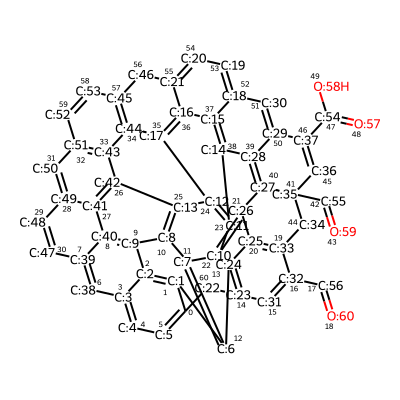

In [19]:
IPythonConsole.drawOptions.addAtomIndices=True
IPythonConsole.drawOptions.annotationFontScale=0.6
IPythonConsole.molSize = 400,400
# Show the molecule with RDKit
mol = Chem.MolFromSmiles(dict[0][name])
mol

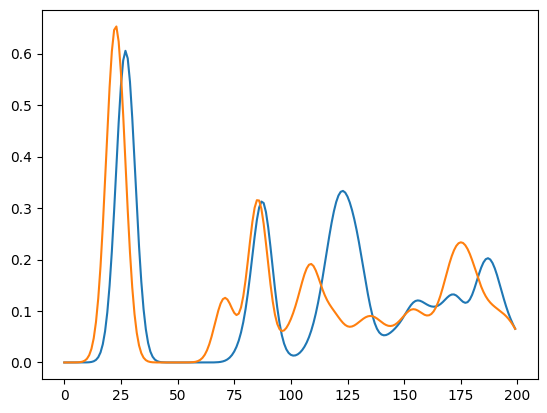

In [20]:
# Plot the spectra with the old dictionary keys
# which correspond to the atom map number C#
plt.plot(spec['17'])
plt.plot(spec['42'])
# plt.plot(spec['59'])
plt.show()

#### View data statistics

In [21]:
atoms = 0
features = np.zeros([4, 2, 3, 2, 2])

# Loop through all molecules in datasets
for i in ids:
    smiles = dict[0][i]
    mol = Chem.MolFromSmiles(smiles)
    for atom in mol.GetAtoms():
        if atom.GetAtomicNum() == 6: # or atom.GetAtomicNum() == 8:
            atoms += 1
            if atom.GetDegree() == 1:
                if atom.GetHybridization() == Chem.rdchem.HybridizationType.SP2:
                    if atom.GetTotalNumHs() == 0:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[0, 0, 0, 0, 0] += 1
                            else:
                                features[0, 0, 0, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[0, 0, 0, 1, 0] += 1
                            else:
                                features[0, 0, 0, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 1:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[0, 0, 1, 0, 0] += 1
                            else:
                                features[0, 0, 1, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[0, 0, 1, 1, 0] += 1
                            else:
                                features[0, 0, 1, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 2:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[0, 0, 2, 0, 0] += 1
                            else:
                                features[0, 0, 2, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[0, 0, 2, 1, 0] += 1
                            else:
                                features[0, 0, 2, 1, 1] += 1
                elif atom.GetHybridization() == Chem.rdchem.HybridizationType.SP3:
                    if atom.GetTotalNumHs() == 0:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[0, 1, 0, 0, 0] += 1
                            else:
                                features[0, 1, 0, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[0, 1, 0, 1, 0] += 1
                            else:
                                features[0, 1, 0, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 1:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[0, 1, 1, 0, 0] += 1
                            else:
                                features[0, 1, 1, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[0, 1, 1, 1, 0] += 1
                            else:
                                features[0, 1, 1, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 2:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[0, 1, 2, 0, 0] += 1
                            else:
                                features[0, 1, 2, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[0, 1, 2, 1, 0] += 1
                            else:
                                features[0, 1, 2, 1, 1] += 1
            elif atom.GetDegree() == 2:
                if atom.GetHybridization() == Chem.rdchem.HybridizationType.SP2:
                    if atom.GetTotalNumHs() == 0:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[1, 0, 0, 0, 0] += 1
                            else:
                                features[1, 0, 0, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[1, 0, 0, 1, 0] += 1
                            else:
                                features[1, 0, 0, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 1:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[1, 0, 1, 0, 0] += 1
                            else:
                                features[1, 0, 1, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[1, 0, 1, 1, 0] += 1
                            else:
                                features[1, 0, 1, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 2:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[1, 0, 2, 0, 0] += 1
                            else:
                                features[1, 0, 2, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[1, 0, 2, 1, 0] += 1
                            else:
                                features[1, 0, 2, 1, 1] += 1
                elif atom.GetHybridization() == Chem.rdchem.HybridizationType.SP3:
                    if atom.GetTotalNumHs() == 0:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[1, 1, 0, 0, 0] += 1
                            else:
                                features[1, 1, 0, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[1, 1, 0, 1, 0] += 1
                            else:
                                features[1, 1, 0, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 1:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[1, 1, 1, 0, 0] += 1
                            else:
                                features[1, 1, 1, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[1, 1, 1, 1, 0] += 1
                            else:
                                features[1, 1, 1, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 2:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[1, 1, 2, 0, 0] += 1
                            else:
                                features[1, 1, 2, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[1, 1, 2, 1, 0] += 1
                            else:
                                features[1, 1, 2, 1, 1] += 1
            elif atom.GetDegree() == 3:
                if atom.GetHybridization() == Chem.rdchem.HybridizationType.SP2:
                    if atom.GetTotalNumHs() == 0:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[2, 0, 0, 0, 0] += 1
                            else:
                                features[2, 0, 0, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[2, 0, 0, 1, 0] += 1
                            else:
                                features[2, 0, 0, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 1:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[2, 0, 1, 0, 0] += 1
                            else:
                                features[2, 0, 1, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[2, 0, 1, 1, 0] += 1
                            else:
                                features[2, 0, 1, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 2:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[2, 0, 2, 0, 0] += 1
                            else:
                                features[2, 0, 2, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[2, 0, 2, 1, 0] += 1
                            else:
                                features[2, 0, 2, 1, 1] += 1
                elif atom.GetHybridization() == Chem.rdchem.HybridizationType.SP3:
                    if atom.GetTotalNumHs() == 0:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[2, 1, 0, 0, 0] += 1
                            else:
                                features[2, 1, 0, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[2, 1, 0, 1, 0] += 1
                            else:
                                features[2, 1, 0, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 1:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[2, 1, 1, 0, 0] += 1
                            else:
                                features[2, 1, 1, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[2, 1, 1, 1, 0] += 1
                            else:
                                features[2, 1, 1, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 2:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[2, 1, 2, 0, 0] += 1
                            else:
                                features[2, 1, 2, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[2, 1, 2, 1, 0] += 1
                            else:
                                features[2, 1, 2, 1, 1] += 1
            elif atom.GetDegree() == 4:
                if atom.GetHybridization() == Chem.rdchem.HybridizationType.SP2:
                    if atom.GetTotalNumHs() == 0:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[3, 0, 0, 0, 0] += 1
                            else:
                                features[3, 0, 0, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[3, 0, 0, 1, 0] += 1
                            else:
                                features[3, 0, 0, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 1:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[3, 0, 1, 0, 0] += 1
                            else:
                                features[3, 0, 1, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[3, 0, 1, 1, 0] += 1
                            else:
                                features[3, 0, 1, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 2:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[3, 0, 2, 0, 0] += 1
                            else:
                                features[3, 0, 2, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[3, 0, 2, 1, 0] += 1
                            else:
                                features[3, 0, 2, 1, 1] += 1
                elif atom.GetHybridization() == Chem.rdchem.HybridizationType.SP3:
                    if atom.GetTotalNumHs() == 0:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[3, 1, 0, 0, 0] += 1
                            else:
                                features[3, 1, 0, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[3, 1, 0, 1, 0] += 1
                            else:
                                features[3, 1, 0, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 1:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[3, 1, 1, 0, 0] += 1
                            else:
                                features[3, 1, 1, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[3, 1, 1, 1, 0] += 1
                            else:
                                features[3, 1, 1, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 2:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[3, 1, 2, 0, 0] += 1
                            else:
                                features[3, 1, 2, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[3, 1, 2, 1, 0] += 1
                            else:
                                features[3, 1, 2, 1, 1] += 1

In [22]:
print(f'Total number of carbons = {atoms:.0f}')
print('---')
print('Degree of atom:')
print(f'1 = {np.sum(features[0, :, :, :, :]):.0f}')
print(f'2 = {np.sum(features[1, :, :, :, :]):.0f}')
print(f'3 = {np.sum(features[2, :, :, :, :]):.0f}')
print(f'4 = {np.sum(features[3, :, :, :, :]):.0f}')
print('---')
print('Number of hydrogens bonded to carbon:')
print(f'0 Hs = {np.sum(features[:, :, 0, :, :]):.0f}')
print(f'1 Hs = {np.sum(features[:, :, 1, :, :]):.0f}')
print(f'2 Hs = {np.sum(features[:, :, 2, :, :]):.0f}')
print('---')
print('Hybridisation of carbon:') 
print(f'SP2 = {np.sum(features[:, 0, :, :, :]):.0f}')
print(f'SP3 = {np.sum(features[:, 1, :, :, :]):.0f}')
print('---')
print('Numer of aromatic carbons:')
print(f'True = {np.sum(features[:, :, :, 0, :]):.0f}')
print(f'False = {np.sum(features[:, :, :, 1, :]):.0f}')
print('---')
print('Is carbon in a ring:')
print(f'True = {np.sum(features[:, :, :, :, 0]):.0f}')
print(f'False = {np.sum(features[:, :, :, :, 1]):.0f}')

Total number of carbons = 5090
---
Degree of atom:
1 = 0
2 = 1377
3 = 3523
4 = 190
---
Number of hydrogens bonded to carbon:
0 Hs = 3551
1 Hs = 1451
2 Hs = 88
---
Hybridisation of carbon:
SP2 = 4649
SP3 = 441
---
Numer of aromatic carbons:
True = 4003
False = 1087
---
Is carbon in a ring:
True = 4968
False = 122


In [23]:
print(tabulate(
    [['Aromatic', features[0, 0, 0, 0, 0], features[0, 0, 0, 0, 1], 'Aromatic', features[0, 0, 1, 0, 0], features[0, 0, 1, 0, 1], 'Aromatic', features[0, 0, 2, 0, 0], features[0, 0, 2, 0, 1]],
    ['Non Aromatic', features[0, 0, 0, 1, 0], features[0, 0, 0, 1, 1], 'Non Aromatic', features[0, 0, 1, 1, 0], features[0, 0, 1, 1, 1], 'Non Aromatic', features[0, 0, 2, 1, 0], features[0, 0, 2, 1, 1]]],
    headers=['Deg 1, 0H, SP2', 'Ring', 'Not Ring', 'Deg 1, 1H, SP2', 'Ring', 'Not Ring', 'Deg 1, 2H, SP2', 'Ring', 'Not Ring']
))
print('')
print(tabulate(
    [['Aromatic', features[0, 1, 0, 0, 0], features[0, 1, 0, 0, 1], 'Aromatic', features[0, 1, 1, 0, 0], features[0, 1, 1, 0, 1], 'Aromatic', features[0, 1, 2, 0, 0], features[0, 1, 2, 0, 1]],
    ['Non Aromatic', features[0, 1, 0, 1, 0], features[0, 1, 0, 1, 1], 'Non Aromatic', features[0, 1, 1, 1, 0], features[0, 1, 1, 1, 1], 'Non Aromatic', features[0, 1, 2, 1, 0], features[0, 1, 2, 1, 1]]],
    headers=['Deg 1, 0H, SP3', 'Ring', 'Not Ring', 'Deg 1, 1H, SP3', 'Ring', 'Not Ring', 'Deg 1, 2H, SP3', 'Ring', 'Not Ring']
))
print('')
print('')
print(tabulate(
    [['Aromatic', features[1, 0, 0, 0, 0], features[1, 0, 0, 0, 1], 'Aromatic', features[1, 0, 1, 0, 0], features[1, 0, 1, 0, 1], 'Aromatic', features[1, 0, 2, 0, 0], features[1, 0, 2, 0, 1]],
    ['Non Aromatic', features[1, 0, 0, 1, 0], features[1, 0, 0, 1, 1], 'Non Aromatic', features[1, 0, 1, 1, 0], features[1, 0, 1, 1, 1], 'Non Aromatic', features[1, 0, 2, 1, 0], features[1, 0, 2, 1, 1]]],
    headers=['Deg 2, 0H, SP2', 'Ring', 'Not Ring', 'Deg 2, 1H, SP2', 'Ring', 'Not Ring', 'Deg 2, 2H, SP2', 'Ring', 'Not Ring']
))
print('')
print(tabulate(
    [['Aromatic', features[1, 1, 0, 0, 0], features[1, 1, 0, 0, 1], 'Aromatic', features[1, 1, 1, 0, 0], features[1, 1, 1, 0, 1], 'Aromatic', features[1, 1, 2, 0, 0], features[1, 1, 2, 0, 1]],
    ['Non Aromatic', features[1, 1, 0, 1, 0], features[1, 1, 0, 1, 1], 'Non Aromatic', features[1, 1, 1, 1, 0], features[1, 1, 1, 1, 1], 'Non Aromatic', features[1, 1, 2, 1, 0], features[1, 1, 2, 1, 1]]],
    headers=['Deg 2, 0H, SP3', 'Ring', 'Not Ring', 'Deg 2, 1H, SP3', 'Ring', 'Not Ring', 'Deg 2, 2H, SP3', 'Ring', 'Not Ring']
))
print('')
print('')
print(tabulate(
    [['Aromatic', features[2, 0, 0, 0, 0], features[2, 0, 0, 0, 1], 'Aromatic', features[2, 0, 1, 0, 0], features[2, 0, 1, 0, 1], 'Aromatic', features[2, 0, 2, 0, 0], features[2, 0, 2, 0, 1]],
    ['Non Aromatic', features[2, 0, 0, 1, 0], features[2, 0, 0, 1, 1], 'Non Aromatic', features[2, 0, 1, 1, 0], features[2, 0, 1, 1, 1], 'Non Aromatic', features[2, 0, 2, 1, 0], features[2, 0, 2, 1, 1]]],
    headers=['Deg 3, 0H, SP2', 'Ring', 'Not Ring', 'Deg 3, 1H, SP2', 'Ring', 'Not Ring', 'Deg 3, 2H, SP2', 'Ring', 'Not Ring']
))
print('')
print(tabulate(
    [['Aromatic', features[2, 1, 0, 0, 0], features[2, 1, 0, 0, 1], 'Aromatic', features[2, 1, 1, 0, 0], features[2, 1, 1, 0, 1], 'Aromatic', features[2, 1, 2, 0, 0], features[2, 1, 2, 0, 1]],
    ['Non Aromatic', features[2, 1, 0, 1, 0], features[2, 1, 0, 1, 1], 'Non Aromatic', features[2, 1, 1, 1, 0], features[2, 1, 1, 1, 1], 'Non Aromatic', features[2, 1, 2, 1, 0], features[2, 1, 2, 1, 1]]],
    headers=['Deg 3, 0H, SP3', 'Ring', 'Not Ring', 'Deg 3, 1H, SP3', 'Ring', 'Not Ring', 'Deg 3, 2H, SP3', 'Ring', 'Not Ring']
))
print('')
print('')
print(tabulate(
    [['Aromatic', features[3, 0, 0, 0, 0], features[3, 0, 0, 0, 1], 'Aromatic', features[3, 0, 1, 0, 0], features[3, 0, 1, 0, 1], 'Aromatic', features[3, 0, 2, 0, 0], features[3, 0, 2, 0, 1]],
    ['Non Aromatic', features[3, 0, 0, 1, 0], features[3, 0, 0, 1, 1], 'Non Aromatic', features[3, 0, 1, 1, 0], features[3, 0, 1, 1, 1], 'Non Aromatic', features[3, 0, 2, 1, 0], features[3, 0, 2, 1, 1]]],
    headers=['Deg 4, 0H, SP2', 'Ring', 'Not Ring', 'Deg 4, 1H, SP2', 'Ring', 'Not Ring', 'Deg 4, 2H, SP2', 'Ring', 'Not Ring']
))
print('')
print(tabulate(
    [['Aromatic', features[3, 1, 0, 0, 0], features[3, 1, 0, 0, 1], 'Aromatic', features[3, 1, 1, 0, 0], features[3, 1, 1, 0, 1], 'Aromatic', features[3, 1, 2, 0, 0], features[3, 1, 2, 0, 1]],
    ['Non Aromatic', features[3, 1, 0, 1, 0], features[3, 1, 0, 1, 1], 'Non Aromatic', features[3, 1, 1, 1, 0], features[3, 1, 1, 1, 1], 'Non Aromatic', features[3, 1, 2, 1, 0], features[3, 1, 2, 1, 1]]],
    headers=['Deg 4, 0H, SP3', 'Ring', 'Not Ring', 'Deg 4, 1H, SP3', 'Ring', 'Not Ring', 'Deg 4, 2H, SP3', 'Ring', 'Not Ring']
))

Deg 1, 0H, SP2      Ring    Not Ring  Deg 1, 1H, SP2      Ring    Not Ring  Deg 1, 2H, SP2      Ring    Not Ring
----------------  ------  ----------  ----------------  ------  ----------  ----------------  ------  ----------
Aromatic               0           0  Aromatic               0           0  Aromatic               0           0
Non Aromatic           0           0  Non Aromatic           0           0  Non Aromatic           0           0

Deg 1, 0H, SP3      Ring    Not Ring  Deg 1, 1H, SP3      Ring    Not Ring  Deg 1, 2H, SP3      Ring    Not Ring
----------------  ------  ----------  ----------------  ------  ----------  ----------------  ------  ----------
Aromatic               0           0  Aromatic               0           0  Aromatic               0           0
Non Aromatic           0           0  Non Aromatic           0           0  Non Aromatic           0           0


Deg 2, 0H, SP2      Ring    Not Ring  Deg 2, 1H, SP2      Ring    Not Ring  Deg 2, 2H, SP2   

In [24]:
bonds = 0
b_features = np.zeros([3, 2, 2])

# Loop through all molecules in datasets
for i in ids:
    smiles = dict[0][i]
    mol = Chem.MolFromSmiles(smiles)
    # Loop through all bonds in molecule
    for bond in mol.GetBonds():
        bonds += 1
        # Count the types of bond
        if bond.GetBondType() == Chem.rdchem.BondType.SINGLE:
            if bond.GetIsConjugated():
                if bond.IsInRing():
                    b_features[0, 0, 0] += 1
                else:
                    b_features[0, 0, 1] += 1
            else:
                if bond.IsInRing():
                    b_features[0, 1, 0] += 1
                else:
                    b_features[0, 1, 1] += 1
        elif bond.GetBondType() == Chem.rdchem.BondType.DOUBLE:
            if bond.GetIsConjugated():
                if bond.IsInRing():
                    b_features[1, 0, 0] += 1
                else:
                    b_features[1, 0, 1] += 1
            else:
                if bond.IsInRing():
                    b_features[1, 1, 0] += 1
                else:
                    b_features[1, 1, 1] += 1
        elif bond.GetBondType() == Chem.rdchem.BondType.AROMATIC:
            if bond.GetIsConjugated():
                if bond.IsInRing():
                    b_features[2, 0, 0] += 1
                else:
                    b_features[2, 0, 1] += 1
            else:
                if bond.IsInRing():
                    b_features[2, 1, 0] += 1
                else:
                    b_features[2, 1, 1] += 1


In [25]:
print(f'Total number of bonds = {bonds:.0f}')
print('---')
print('Number of types of bond:')
print(f'Single = {np.sum(b_features[0, :, :]):.0f}')
print(f'Double = {np.sum(b_features[1, :, :]):.0f}')
print(f'Aromatic = {np.sum(b_features[2, :, :]):.0f}')
print('---')
print('Is bond conjugated:')
print(f'True = {np.sum(b_features[:, 0, :]):.0f}')
print(f'False = {np.sum(b_features[:, 1, :]):.0f}')
print('---')
print('Is bond in a ring:')
print(f'True = {np.sum(b_features[:, :, 0]):.0f}')
print(f'False = {np.sum(b_features[:, :, 1]):.0f}')
print('')
print(tabulate(
    [['Conjugated', b_features[0, 0, 0], b_features[0, 0, 1]],
     ['Non Conjugated', b_features[0, 1, 0], b_features[0, 1, 1]]],
     headers=['SINGLE', 'Ring', 'Not Ring']
))
print(' ')
print(tabulate(
    [['Conjugated', b_features[1, 0, 0], b_features[1, 0, 1]],
     ['Non Conjugated', b_features[1, 1, 0], b_features[1, 1, 1]]],
     headers=['DOUBLE', 'Ring', 'Not Ring']
))
print(' ')
print(tabulate(
    [['Conjugated', b_features[2, 0, 0], b_features[2, 0, 1]],
     ['Non Conjugated', b_features[2, 1, 0], b_features[2, 1, 1]]],
     headers=['AROMATIC', 'Ring', 'Not Ring']
))

Total number of bonds = 7347
---
Number of types of bond:
Single = 1741
Double = 476
Aromatic = 5130
---
Is bond conjugated:
True = 6112
False = 1235
---
Is bond in a ring:
True = 6906
False = 441

SINGLE            Ring    Not Ring
--------------  ------  ----------
Conjugated         303         210
Non Conjugated    1176          52
 
DOUBLE            Ring    Not Ring
--------------  ------  ----------
Conjugated         295         174
Non Conjugated       2           5
 
AROMATIC          Ring    Not Ring
--------------  ------  ----------
Conjugated        5130           0
Non Conjugated       0           0


In [26]:
oh = 0
cooh = 0
epoxy = 0
cho = 0
keto = 0

for i in ids:
    numbers = []
    for char in i:
        if char.isdigit():
            numbers.append(int(char))
    oh += numbers[0]
    oh += numbers[5]
    cooh += numbers[1]
    epoxy += numbers[2]
    epoxy += numbers[6]
    epoxy += numbers[7]
    cho += numbers[3]
    keto += numbers[4]
    
tot_groups = oh + cooh + epoxy + cho + keto

print(f'Number of functional groups:')
print(f'Alcohols: {oh} ({(oh/tot_groups)*100:.2f}%)')
print(f'Carboxylic acids: {cooh} ({(cooh/tot_groups)*100:.2f}%)')
print(f'Epoxy: {epoxy} ({(epoxy/tot_groups)*100:.2f}%)')
print(f'Aldehyde: {cho} ({(cho/tot_groups)*100:.2f}%)')
print(f'Ketone: {keto} ({(keto/tot_groups)*100:.2f}%)')


Number of functional groups:
Alcohols: 69 (16.95%)
Carboxylic acids: 71 (17.44%)
Epoxy: 159 (39.07%)
Aldehyde: 51 (12.53%)
Ketone: 57 (14.00%)
